# Heartattack Data

Data taken from: https://www.kaggle.com/carlosdg/a-detail-description-of-the-heart-disease-dataset

In [1]:
# Load packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Enable multiple outputs per cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Read in data
heartattack = pd.read_csv("../data/heartattack_data/heart.csv")


In [2]:
# Check if data was loaded properly
heartattack.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Q: What attributes does the dataset have, what do they mean and what is their level of measurement? <br>
A: 

    age: age -- ratio
    sex: sex -- nominal
    cp: Chest Pain type (4 values) -- nominal
    trtbps: resting blood pressure (in mm Hg) -- ratio
    chol: cholestoral in mg/dl fetched via BMI sensor -- ratio
    fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) -- originally ratio, now nominal
    restecg: resting electrocardiographic results -- nominal
    thalachh: maximum heart rate achieved -- ratio
    exng: exercise induced angina (1 = yes; 0 = no) -- nominal
    oldpeak: ST depression induced by exercise relative to rest -- ratio
    slp: the slope of the peak exercise ST segment -- nominal
    caa: number of major vessels (0-3) -- ratio
    thall: Thal rate (0-3) -- nominal
    output: heartattack yes/no (target variable) -- nominal

For details see: https://www.kaggle.com/carlosdg/a-detail-description-of-the-heart-disease-dataset

In [3]:
# View attribute names
heartattack.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [4]:
# Rename attributes for easier handling
heartattack.rename(
    columns = {
        'cp' : 'chest_pain_type',
        'trtbps' : 'bloodpressure',
        'chol' : 'cholesterine',
        'fbs' : 'blood_sugar_high',
        'restecg' : 'electrocardiogram_on_rest',
        'thalachh' : 'max_heartrate_test_achieved',
        'exng' : 'angina_during_exercise',
        'oldpeak' : 'ecg_displacement',
        'slp' : 'slope_ST_during_exercise',
        'caa' : 'count_blood_vessels',
        'thall' : 'results_bloodflow'
        },
    inplace = True
)



In [5]:
# Check if the data types of the attributes were set correctly
heartattack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          303 non-null    int64  
 1   sex                          303 non-null    int64  
 2   chest_pain_type              303 non-null    int64  
 3   bloodpressure                303 non-null    int64  
 4   cholesterine                 303 non-null    int64  
 5   blood_sugar_high             303 non-null    int64  
 6   electrocardiogram_on_rest    303 non-null    int64  
 7   max_heartrate_test_achieved  303 non-null    int64  
 8   angina_during_exercise       303 non-null    int64  
 9   ecg_displacement             303 non-null    float64
 10  slope_ST_during_exercise     303 non-null    int64  
 11  count_blood_vessels          303 non-null    int64  
 12  results_bloodflow            303 non-null    int64  
 13  output              

In [6]:
# Rename the categories of the categorical variables for easier interpretability
sex_mapper = {
    0 : 'female',
    1 : 'male'
}

chest_pain_type_mapper = {
    0: 'asymptomatic',
    1: 'atypical_angina',
    2: 'pain_without_angina',
    3: 'typical_angina'
}

blood_sugar_high_mapper = {
    0 : 'no',
    1 : 'yes'
}

electrocardiogram_on_rest_mapper = {
    0 : 'probable_left_ventricular_hypertrophy',
    1 : 'normal',
    2 : 'abnormalities'
}

angina_during_exercise_mapper = {
    0 : 'no',
    1 : 'yes'
}

slope_ST_during_exercise_mapper = {
    0 : 'descending',
    1 : 'flat',
    2 : 'ascending'
}

results_bloodflow_mapper = {
      0 : 'NULL',
      1 : 'fixed defect', 
      2 : 'normal',
      3 : 'reversible defect'
}

# output_mapper = {
#     0 : 'heartattack',
#     1 : 'no heartattack'
# }

# Convert variables to categorical, where applicable
heartattack['sex'] = heartattack['sex'].replace(sex_mapper)
heartattack['sex'] = pd.Categorical(heartattack['sex'])

heartattack['chest_pain_type'] = heartattack['chest_pain_type'].replace(chest_pain_type_mapper)
heartattack['chest_pain_type'] = pd.Categorical(heartattack['chest_pain_type'])

heartattack['blood_sugar_high'] = heartattack['blood_sugar_high'].replace(blood_sugar_high_mapper)
heartattack['blood_sugar_high'] = pd.Categorical(heartattack['blood_sugar_high'])

heartattack['electrocardiogram_on_rest'] = heartattack['electrocardiogram_on_rest'].replace(electrocardiogram_on_rest_mapper)
heartattack['electrocardiogram_on_rest'] = pd.Categorical(heartattack['electrocardiogram_on_rest'])

heartattack['angina_during_exercise'] = heartattack['angina_during_exercise'].replace(angina_during_exercise_mapper)
heartattack['angina_during_exercise'] = pd.Categorical(heartattack['angina_during_exercise'])

heartattack['slope_ST_during_exercise'] = heartattack['slope_ST_during_exercise'].replace(slope_ST_during_exercise_mapper)
heartattack['slope_ST_during_exercise'] = pd.Categorical(heartattack['slope_ST_during_exercise'])

heartattack['results_bloodflow'] = heartattack['results_bloodflow'].replace(results_bloodflow_mapper)
heartattack['results_bloodflow'] = pd.Categorical(heartattack['results_bloodflow'])

# heartattack['output'] = heartattack['output'].replace(output_mapper)
# heartattack['output'] = pd.Categorical(heartattack['output'])


In [7]:
# Examine if there are still NULL values in results_bloodflow
heartattack['results_bloodflow'].value_counts()

normal               166
reversible defect    117
fixed defect          18
NULL                   2
Name: results_bloodflow, dtype: int64

In [8]:
# Drop NULL values
heartattack.drop(heartattack[heartattack['results_bloodflow'] == 'NULL'].index, inplace=True)

# count_blood_vessels == 4 also needs to be dropped, see kaggle link above at original column 'caa'
heartattack.drop(heartattack[heartattack['count_blood_vessels'] == 4].index, inplace=True)

In [9]:
# Check if removing the instances was successful
heartattack.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   age                          296 non-null    int64   
 1   sex                          296 non-null    category
 2   chest_pain_type              296 non-null    category
 3   bloodpressure                296 non-null    int64   
 4   cholesterine                 296 non-null    int64   
 5   blood_sugar_high             296 non-null    category
 6   electrocardiogram_on_rest    296 non-null    category
 7   max_heartrate_test_achieved  296 non-null    int64   
 8   angina_during_exercise       296 non-null    category
 9   ecg_displacement             296 non-null    float64 
 10  slope_ST_during_exercise     296 non-null    category
 11  count_blood_vessels          296 non-null    int64   
 12  results_bloodflow            296 non-null    category
 13  outpu

In [10]:
# Check for further values == 0
# None found
heartattack.describe()

,age,bloodpressure,cholesterine,max_heartrate_test_achieved,ecg_displacement,count_blood_vessels,output
count,296.000000,296.00000,296.000000,296.000000,296.000000,296.000000,296.000000
mean,54.523649,131.60473,247.155405,149.560811,1.059122,0.679054,0.540541
std,9.059471,17.72662,51.977011,22.970792,1.166474,0.939726,0.499198
min,29.000000,94.00000,126.000000,71.000000,0.000000,0.000000,0.000000
25%,48.000000,120.00000,211.000000,133.000000,0.000000,0.000000,0.000000
50%,56.000000,130.00000,242.500000,152.500000,0.800000,0.000000,1.000000
75%,61.000000,140.00000,275.250000,166.000000,1.650000,1.000000,1.000000
max,77.000000,200.00000,564.000000,202.000000,6.200000,3.000000,1.000000


<AxesSubplot:xlabel='count_blood_vessels', ylabel='count'>

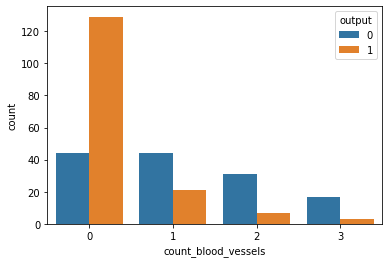

In [11]:
# Inspect attribute 'count_blood_vessels' closer
# No count_blood_vessels == 4 should be in the data any longer
# The higher the value, the more likely it is to have a heartattack
# Note: output == 0: heartattack, output == 1: no heartattack
sns.countplot(data = heartattack, x = 'count_blood_vessels', hue='output')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ecg_displacement', ylabel='Density'>

count    296.000000
mean       1.059122
std        1.166474
min        0.000000
25%        0.000000
50%        0.800000
75%        1.650000
max        6.200000
Name: ecg_displacement, dtype: float64

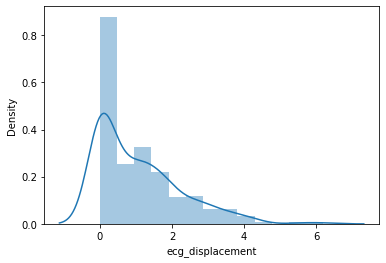

In [12]:
# Inspect heartattack['oldpeak'] closer
# oldpeak is actually a float variable
sns.distplot(heartattack['ecg_displacement'])
heartattack['ecg_displacement'].describe()

In [13]:
# Now the remaining numerical variables can be correlated
# Interpretation: see below
heartattack_corr = heartattack.corr()
heartattack_corr

,age,bloodpressure,cholesterine,max_heartrate_test_achieved,ecg_displacement,count_blood_vessels,output
age,1.000000,0.288701,0.200920,-0.395989,0.199373,0.364229,-0.225453
bloodpressure,0.288701,1.000000,0.126705,-0.051817,0.196793,0.102042,-0.148922
cholesterine,0.200920,0.126705,1.000000,-0.001947,0.042144,0.119006,-0.076541
max_heartrate_test_achieved,-0.395989,-0.051817,-0.001947,1.000000,-0.346742,-0.267861,0.426655
ecg_displacement,0.199373,0.196793,0.042144,-0.346742,1.000000,0.292905,-0.428804
count_blood_vessels,0.364229,0.102042,0.119006,-0.267861,0.292905,1.000000,-0.467158
output,-0.225453,-0.148922,-0.076541,0.426655,-0.428804,-0.467158,1.000000


<Figure size 576x432 with 0 Axes>

<AxesSubplot:>

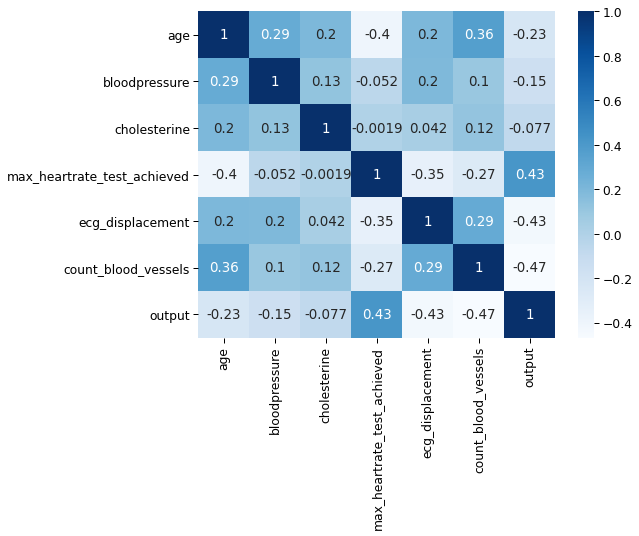

In [14]:
# Create a heatmap for a better first inspection of the correlations
# Detailled inspection follows below
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)

sns.heatmap(heartattack_corr, annot=True, cmap='Blues')

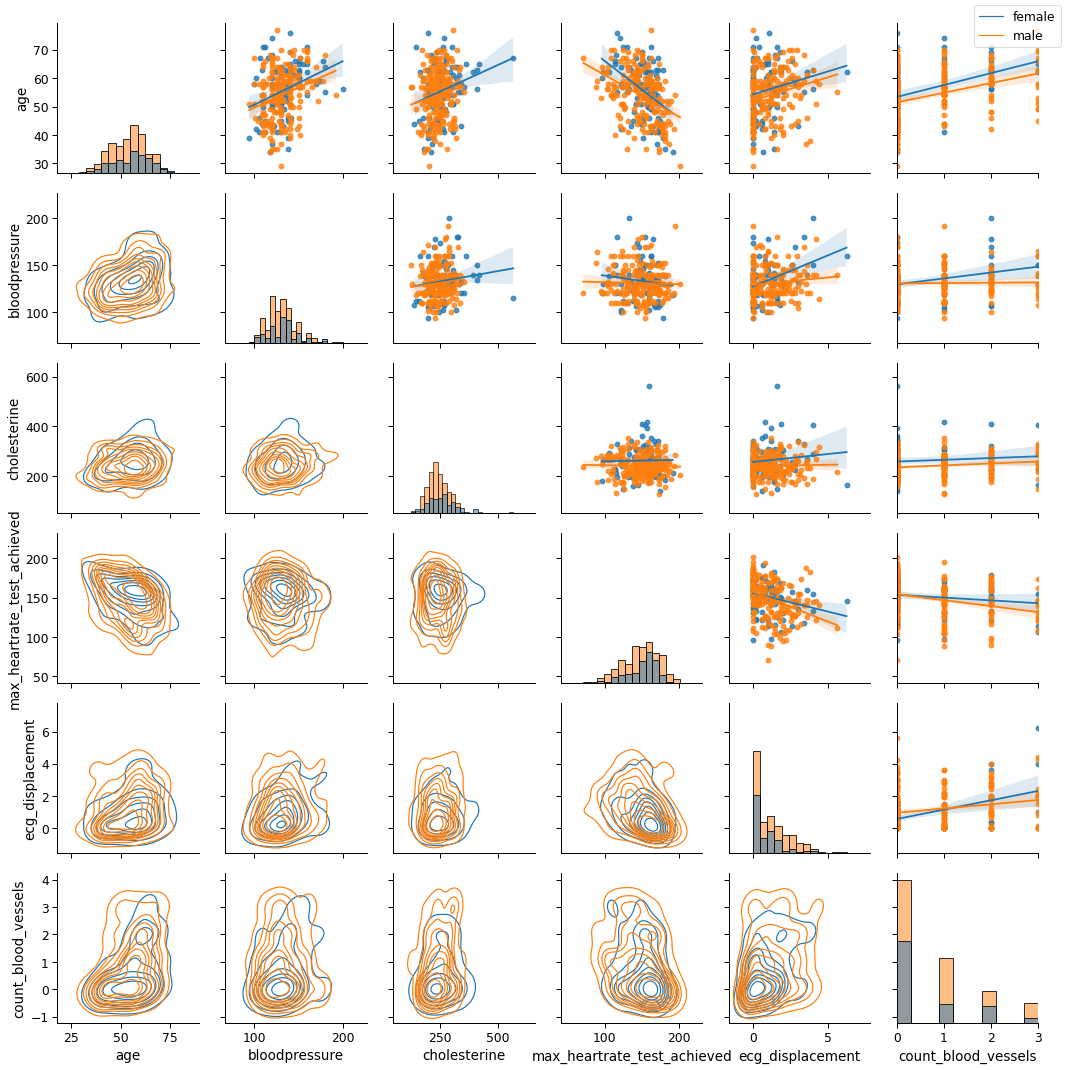

In [15]:
# Select only numerical data for the plot
heartattack_plot_df = heartattack.loc[:,['age','sex','bloodpressure','cholesterine','max_heartrate_test_achieved','ecg_displacement','count_blood_vessels']]

# Differentiate between the sexes
pair_plot = sns.PairGrid(data = heartattack_plot_df, hue='sex')

# Examine reg plots for connections between variables
pair_plot.map_upper(sns.regplot)

# Examine hists for (relative) frequencies
pair_plot.map_diag(sns.histplot)

# Examine KDE plots to get an approximate feeling of each variable's distribution
pair_plot.map_lower(sns.kdeplot)

# Put legend at the upper right
handles = pair_plot._legend_data.values()
labels = pair_plot._legend_data.keys()
pair_plot.fig.legend(handles = handles, labels = labels, loc='upper right')

Interpreting the plot + correlations, i.e. the relationships of the numerical variables

With a higher <b>age</b>: <br>
    bloodpressure seems to rise  (both sexes)<br>
    cholesterine seems to rise (both sexes)<br>
    max_heartrate_test_achieved seems to shrink (both sexes)<br>
    ecg_displacement seems to rise (both sexes)<br>
    count_blood_vessels seems to rise (both sexes)

With a higher <b>bloodpressure</b>:<br>
    cholesterine seems to increase (both sexes)<br>
    max_heartrate_test_achieved seems to be unrelated (both sexes)<br>
    ecg_displacement rises for men, while for women it is only rising a little bit<br>
    count_blood_vessels seems to rise for women
    
With a higher <b>cholesterine</b>:<br>
    max_heartrate_test_achieved seems to be unaffected (both sexes)<br>
    ecg_displacement seems to be unaffected (both sexes)<br>
    count_blood_vessels seems to rise only slightly (both sexes)
    
With a higher <b>max_heartrate_achieved</b>:<br>
    ecg_displacement seems to sink. This is maybe confounded by age, since with a lower age, a higher max_heartrate_test_achieved can be achieved (both sexes)<br>
    count_blood_vessels seem to sink slightly (both sexes)<br>
    
With a higher <b>ecg_displacement</b>:<br>
    count_blood_vessels seem to rise slightly (both sexes), maybe a little bit stronger for women than for men

In [16]:
# Q: Are the classes balanced?
# A: There are approximately twice as many men in the dataset than women
heartattack['sex'].value_counts()

male      201
female     95
Name: sex, dtype: int64

In [17]:
# Q: How many males and females have a heartattack?
# A: see below
# Interpretation: Care must taken. There are only 24 women with a heartattack in the data
# Note: output == 0: heartattack, output == 1: no heartattack
heartattack.loc[:,['sex','output']].value_counts()

sex     output
male    0         112
        1          89
female  1          71
        0          24
dtype: int64

In [18]:
# Q: How many people have a heartattack (independet of the sex)?
# A: 136
heartattack.output.value_counts()

1    160
0    136
Name: output, dtype: int64

### Relationships with the output variable

<AxesSubplot:xlabel='sex', ylabel='age'>

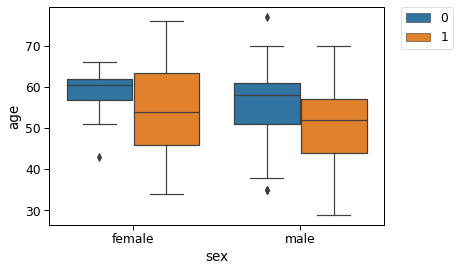

In [19]:
# Note: output == 0: heartattack, output == 1: no heartattack
# Q: How do men and women compare in their tendency to have a heart disease, depending on their age?
# A: Those having heart problems in the dataset seem to be older on average
sns.boxplot(data = heartattack, x = 'sex', y = 'age', hue = 'output')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

<AxesSubplot:xlabel='sex', ylabel='age'>

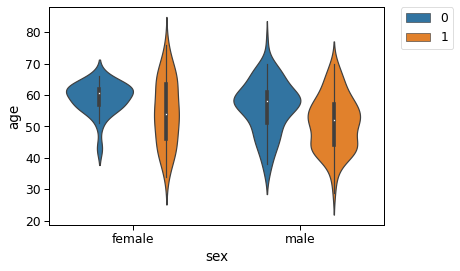

In [20]:
# Note: output == 0: heartattack, output == 1: no heartattack
# Q: What sex has more young people with heart problems?
# A1: There seem to be more young men than women having a heart attack. 
# A2: Interpret with care! There are twice as many men than women in the dataset and only a 24 women with a heartattack compared to 112 men
sns.violinplot(data = heartattack, x = 'sex', y = 'age', hue = 'output')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

<AxesSubplot:xlabel='sex', ylabel='bloodpressure'>

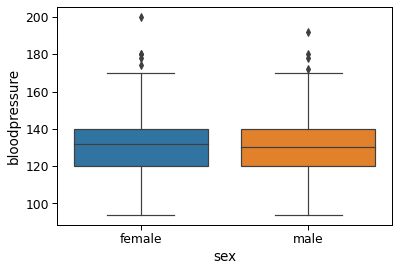

In [21]:
# Q: Do women tend to have a lower blood pressure than men?
# A: No
sns.boxplot(data = heartattack, x = 'sex', y = 'bloodpressure')

<AxesSubplot:xlabel='sex', ylabel='bloodpressure'>

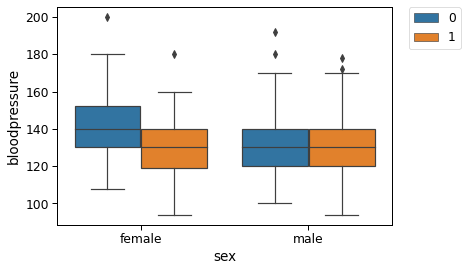

In [22]:
# Note: 0 == heartattack, 1 == no heartattack
# Q: Are there differences in the data with regards to sex, bloodpressure and a heartattack?
# A1: Yes, women who have a heartattack seem to have a higher bloodpressure
# A2: Men on the other hand seem to have heartattacks regardless of their bloodpressure
sns.boxplot(data = heartattack, x = 'sex', y = 'bloodpressure', hue = 'output')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Classification

Six different classifiers were used to classifiy whether a hearattack is present (output == 0). They are further evaluated below.

### Prepare Data

#### Set seed value for reproducible results

In [23]:
## Ensure reproducible results
# Set a seed value
seed_value= 2021 

# 1. Set `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)

#### Scale the numeric data

In [24]:
# Required for distance-based algorithms, i.e. kNN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_to_scale = heartattack.loc[:, heartattack.columns != 'output'].select_dtypes(include=['float64','int64'])
heartattack[data_to_scale.columns] = scaler.fit_transform(data_to_scale)


#### Split data into training and test set

In [25]:
from sklearn.model_selection import train_test_split

# Get dummies without the dependent variable and for each var, drop the first level
output = heartattack['output']
heartattack = pd.get_dummies(heartattack.loc[:, heartattack.columns != 'output'], drop_first = True) 
heartattack['output'] = output

# Include the seed value
training, test = train_test_split(heartattack, test_size = 0.2, random_state = seed_value)
len(training)
len(test)

# Split up the training and test data into data and output
train_x = training.loc[:, training.columns != 'output']
train_y = training.loc[:,['output']]

train_y = np.ravel(train_y)

test_x = test.loc[:, test.columns != 'output']
test_y = test.loc[:,['output']]

236

60

#### Linear SVM

In [26]:
from sklearn import svm

# create clf
clf_svm = svm.SVC(kernel = 'linear', probability = True, random_state = seed_value)

# train clf
clf_svm.fit(train_x, train_y)

clf_svm.predict(test_x)

SVC(kernel='linear', probability=True, random_state=2021)

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1], dtype=int64)

#### Decision Tree

In [27]:
from sklearn import tree


# create clf
clf_dec = tree.DecisionTreeClassifier(criterion="entropy", random_state = seed_value)

# train clf
clf_dec.fit(train_x, train_y)

clf_dec.predict(test_x)


DecisionTreeClassifier(criterion='entropy', random_state=2021)

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1], dtype=int64)

#### Naive Bayes

In [28]:
from sklearn.naive_bayes import GaussianNB
import numpy as np

# create clf
clf_gnb = GaussianNB()

# train clf
clf_gnb.fit(train_x, train_y)

clf_gnb.predict(test_x)

GaussianNB()

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1], dtype=int64)

#### Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

clf_log = LogisticRegression(max_iter = 4000, random_state = seed_value)
clf_log.fit(train_x, train_y)

clf_log.predict(test_x)

LogisticRegression(max_iter=4000, random_state=2021)

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1], dtype=int64)

#### Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

clf_rfc = RandomForestClassifier(random_state = seed_value, max_depth=5, n_estimators=20)
clf_rfc.fit(train_x, train_y)
print(clf_rfc.predict(test_x))


RandomForestClassifier(max_depth=5, n_estimators=20, random_state=2021)

[1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 1
 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1]


#### kNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors=3)
clf_knn.fit(train_x,train_y)
print(clf_knn.predict(test_x))

KNeighborsClassifier(n_neighbors=3)

[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 0 1 0 0 1 1 1
 0 1 1 1 1 0 0 1 1 0 1 0 1 0 0 1 0 1 0 1 1 1 0]


## Classifier Evaluation

### Cross-Validation

In [33]:
def cv_evaluate_clf(dataset: pd.DataFrame, dependent_var: pd.DataFrame, clf, pos_label: str, k: int):
    
    # Imports
    from sklearn.model_selection import cross_validate
    from sklearn.metrics import make_scorer
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import f1_score
    from sklearn.metrics import precision_score
    from sklearn.metrics import recall_score
    from sklearn.metrics import roc_auc_score
    
    ## Params for cross_validate function
    # Metrics
    scoring = {
        'accuracy': make_scorer(accuracy_score),
        'f1': make_scorer(f1_score, pos_label = 0),
        'precision': make_scorer(precision_score, pos_label = 0),
        'recall': make_scorer(recall_score, pos_label = 0),
        'roc_auc': make_scorer(roc_auc_score),
        'balanced_accuracy_score': make_scorer(balanced_accuracy_score)
              }
    
    # X, y
    independent_vars = dataset.loc[:, dataset.columns != f'{dependent_var}']
    dependent_var = dataset[f'{dependent_var}']
    
    # CV
    scores = cross_validate(estimator=clf, X=independent_vars, y=dependent_var, scoring=scoring, cv=k, return_estimator = True)
    
    return scores


In [34]:
def classifier_results_df(clf_list: list, dataset: pd.DataFrame, pos_label: str, k: int, grouped_output: bool = True, sort_by: str = 'test_accuracy') -> pd.DataFrame:
    
    # Cross-validate each classifier and put in list 
    metrics_per_clf = [cv_evaluate_clf(dataset=dataset, dependent_var='output',clf=x, pos_label=pos_label, k=k) for x in clfList]
    
    # Put results into DataFrame
    result_df = pd.DataFrame(metrics_per_clf)
    
    # Explode rows
    result_df = result_df.apply(lambda x: x.explode())
    
    # Set index
    result_df.index = range(len(clfList) * k)
    
    # Automatically infer types
    result_df = result_df.convert_dtypes()
    
    # Set estimator as string "manually"
    result_df['estimator'] = result_df.estimator.astype("string")
    
    if grouped_output:
        
        # Group by the used estimator and sort by accuracy by default
        result_df_grouped = result_df.groupby('estimator').mean().sort_values(by=sort_by, ascending=False)
        
        # Remove cols fit_time and score_time
        columns = ['fit_time', 'score_time']
        result_df_grouped = result_df_grouped.drop(columns, axis=1)
        return result_df_grouped
    
    return result_df
    

In [35]:
clfList = [clf_svm,clf_dec,clf_gnb,clf_log,clf_rfc,clf_knn]

result_df = classifier_results_df(clf_list=clfList, dataset=heartattack, pos_label=0, k=10)
result_df

NameError: name 'balanced_accuracy_score' is not defined

Interpretation:
Since the logistic regression scores highest with regards to the metrics, it seems to be the classifier of choice for this dataset. 
Of course, every classifier could be further optimized with e.g. grid search and other hyperparameter tuning measures.
But since the logistic regression is already good as of now and the sample size is very small (n=296), no further measures are taken

### Explaining the model

Inspired by: https://www.kaggle.com/tentotheminus9/what-causes-heart-disease-explaining-the-model

#### Permutation Importance

From a lay person's perspective, I expected high blood pressure, high blood sugar and high cholesterine values to be pivotal for the model
I used the permutation importance measure from eli5

Link: https://eli5.readthedocs.io/en/latest/blackbox/permutation_importance.html#model-inspection

Permutation importance in a nutshell: <br>
    Shuffle the values in a single column, make predictions using the resulting dataset. <br>
    Use these predictions and the true target values to calculate how much the loss function suffered from shuffling.<br>
    That performance deterioration measures the importance of the variable you just shuffled. 
               
Source: https://www.kaggle.com/dansbecker/permutation-importance

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance
feature_names = train_x.columns.tolist()

perm = PermutationImportance(clf_log, random_state=seed_value).fit(train_x, train_y)
eli5.show_weights(perm, feature_names = feature_names)

Apparently, that is not the case. Instead, the count_blood_vessels has the highest impact.
Recall: This feature refers to the number of narrow blood vessels seen. 
This is why the higher the value of this feature, the more likely it is to have a heart disease
Source: https://www.kaggle.com/carlosdg/a-detail-description-of-the-heart-disease-dataset

Conclusion: the models seems to make sense regarding count_blood_vessels!

#### Partial Dependence Plots

In [ ]:
# It is known that there is relationship between the variables slope_ST_during_exercise_descending and ecg_displacement (see boxplot)
# Source: https://www.kaggle.com/carlosdg/a-detail-description-of-the-heart-disease-dataset 
# As this relationship is not part of the logistic classifier as an interation, these vars are not recognized by the permutation importance above as being important
sns.boxplot(data=heartattack, x ='slope_ST_during_exercise_descending', y ='ecg_displacement', hue='output')

The partial dependence plot shows the marginal effect one or two features have on the predicted outcome of a machine learning model
Source: https://christophm.github.io/interpretable-ml-book/pdp.html

In [ ]:
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

features_to_plot = ['ecg_displacement', 'slope_ST_during_exercise_descending']
inter1  =  pdp.pdp_interact(model=clf_log, dataset=test_x, model_features=feature_names, features=features_to_plot)

pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour')
plt.show()

The partial dependence plot clearly shows that: for high ecg_displacement values and slope_ST_during_exercise_descending == 1, a heartattack (output == 0) is rather present. This interaction could probably be put into the classifiers to further improve the classification results. For a deeper understanding of the classification results (e.g. more interaction effects), more domain knowledge is required.

## Conclusion

The dataset is best classified by a logistic regression with an average accuracy of 0.854138 (test_size = 0.2, cv = 10, no grid search). Counterintuively, not high blood pressure, high blood sugar or high cholesterine values, but the attribute count_blood_vessels hast the highest impact onto the classification.